In [12]:
# import  required libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
#import for stock data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import for reading stock dataa from google finance ## install 'pip install pandas_datareader' before importing here in anacaonda only..
!pip install pandas_datareader
from pandas_datareader import data
#import pandas_datareader.data as dt
from datetime import datetime

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [19]:
!pip install quandl

  Stored in directory: C:\Users\sumit\AppData\Local\pip\Cache\wheels\9f\5a\d3\6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [32]:
import quandl
import datetime
#define stocks (stocker ticker symbols) to be used for data analytics
stock_list =['AAPL','AMZN','MSFT','YHOO','GOOG']
start = datetime.datetime(2006,1,1)
ends = datetime.datetime(2017,1,1)

bac = data.get_data_yahoo('BAC',start,ends)
print(bac.head())



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/BAC/history?period1=1136068200&period2=1483309799&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  36.147552
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.763645
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.809727
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.755962
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.779007


In [33]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.524723,185.792936,187.650239,187.675992,3.264243e+07,186.133782
std,22.244902,21.970341,22.109037,22.123898,1.415982e+07,21.870434
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.052505,169.737499,171.355000,171.032497,2.285825e+07,170.217468
50%,187.360001,184.845001,186.204994,186.084999,2.910085e+07,184.287506
75%,209.312500,205.632496,207.299999,207.645000,3.891910e+07,205.888016
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [34]:
df_APPL = pd.DataFrame(AAPL['Close'])

In [35]:
df_APPL.head()

,Close
Date,
2018-03-15,178.649994
2018-03-16,178.020004
2018-03-19,175.300003
2018-03-20,175.240005
2018-03-21,171.270004


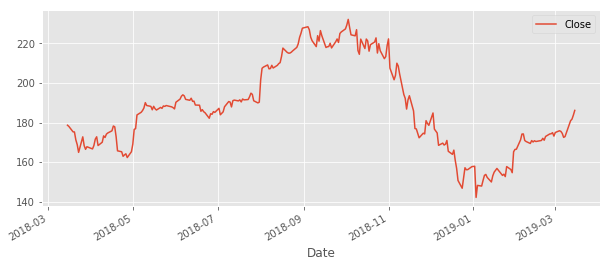

In [36]:
df_APPL.plot(legend=True, figsize=(10,4))

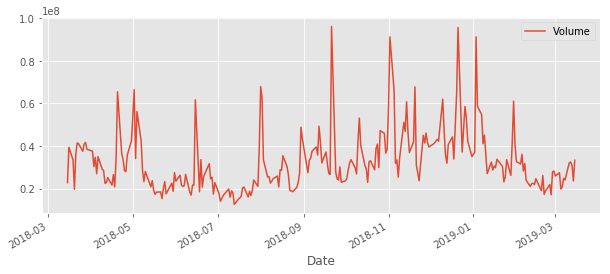

In [37]:
#view volume of stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

NameError: name 'YHOO' is not defined

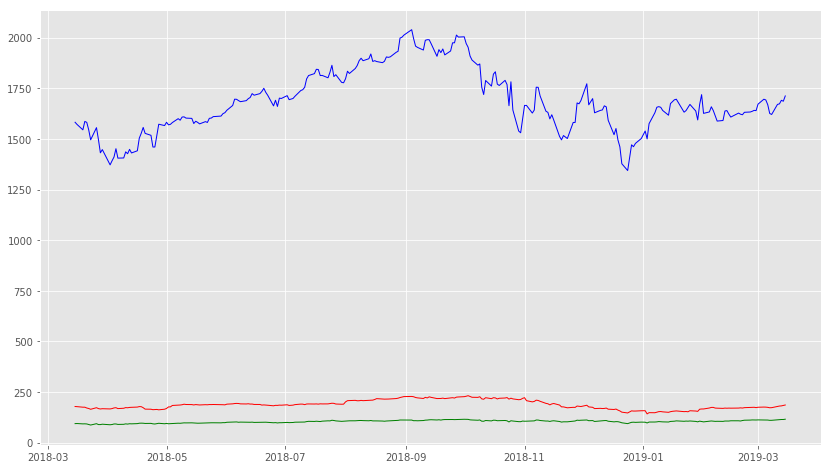

In [126]:
#plot all stock performance on Close for entire year
#lot all stock performance on Close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Close'], 'r', label='Apple',linewidth=1)
plt.plot(AMZN['Close'], 'b', label='Amazon',linewidth=1)
plt.plot(MSFT['Close'], 'g', label='Microsoft',linewidth=1)
plt.plot(YHOO['Close'], 'y', label='Yahoo',linewidth=1)
plt.plot(GOOG['Close'], 'm', label='Google',linewidth=1)
#set legend
plt.legend()
plt.show()

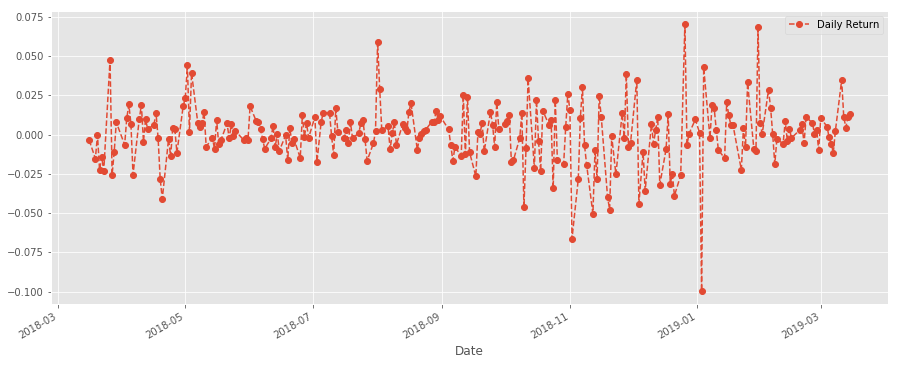

In [127]:

#compute percent change using built in pct_change method for the Apple stock
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [129]:
#Fetch closing prices for stock symbols and put them into the data frame
closing_price_stock = data.DataReader(['AAPL','AMZN','MSFT','GOOG','YHOO'],'yahoo',start,end)['Close']

#view first 5 records of closing price for eacah stock
closing_price_stock.head()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1136068200&period2=1552775399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/AMZN/history?period1=1136068200&period2=1552775399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/MSFT/history?period1=1136068200&period2=1552775399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/GOOG/history?period1=1136068200&period2=1552775399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://finance.yahoo.com:443 "GET /quote/YHOO/history?period1=1136068200&period2=1552775399&interval=1d&frequency=1d&filter=history HTTP/1.1" 302 36
DEBUG:urlli

C:\Users\sumit\Anaconda3\lib\site-packages\pandas_datareader\base.py:230: SymbolWarning: Failed to read symbol: 'YHOO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2006-01-03,10.678572,47.580002,216.208771,26.840000,NaN
2006-01-04,10.710000,47.250000,221.181427,26.969999,NaN
2006-01-05,10.625714,47.650002,224.162048,26.990000,NaN
2006-01-06,10.900000,47.869999,231.325455,26.910000,NaN
2006-01-09,10.864285,47.080002,231.941452,26.860001,NaN


C:\Users\sumit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


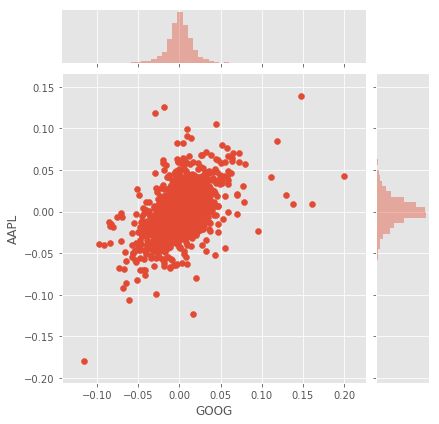

In [131]:
#compute percentage change using built in pct_change method for the stocks
stock_returns = closing_price_stock.pct_change()

#compare daily return of Google and Apple
sns.jointplot('GOOG','AAPL', stock_returns, kind='scatter')

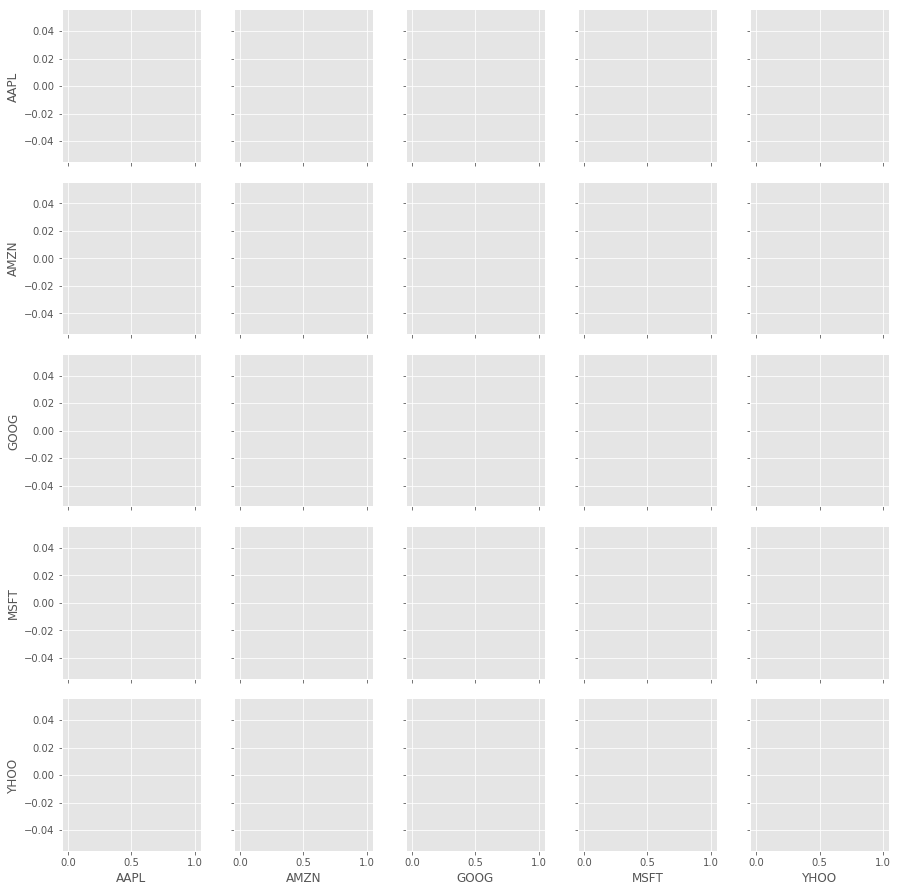

In [139]:
#using pair plot for complete visual analysis and comparison of all stocks
sns.pairplot(stock_returns.dropna())

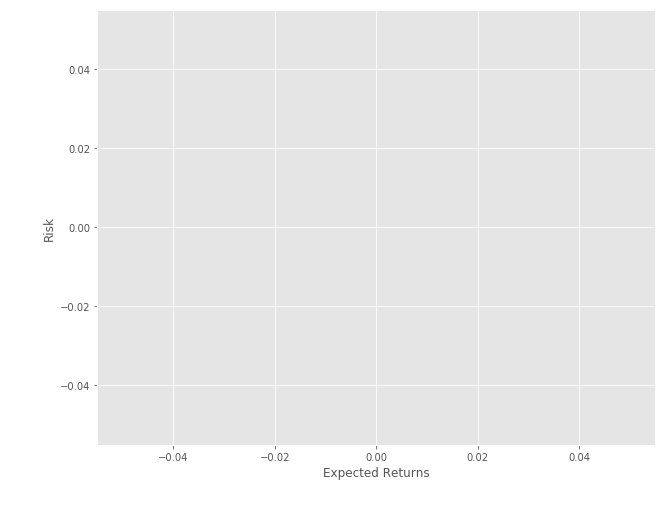

In [140]:
#comparing the expected return with the standard devaition of the daily return
returns = stock_returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,8))
plt.scatter(returns.mean(),returns.std(),alpha=0.5, s = area)
#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
#set the graph properties
for label, x,y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
    label,
        xy=(x,y), xytext=(50,50),
        textcoords = 'offset points', ha='center', va = 'bottom',
        arrowprops = dict(arrowstyle='-', connectionstyle='arc3, rad=-0.3')
    )

C:\Users\sumit\.ipython
